# GROUP 8 - Solution to P01

**Students:** Marek Majoch <s13mmajo@uni-bonn.de>, Lauryn Zhao <s19yzhao@uni-bonn.de>, Diana Lopez <s09dlope@uni-bonn.de>
**Deadline:** 17. Oct 2024, 13:00 

## Problem 1: Randomly sampling points on the sphere

- Write a piece of code that will sample 10,000 points uniformly distributed on the surface of a sphere. Your code should return the points' angular coordinates $\theta, \phi$ (you can assume a unit sphere wlog).


In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math 
from mpl_toolkits import mplot3d
%matplotlib widget 
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.ticker as mticker

In [5]:
def sample_sphere(n):
    """
    Computes two random and uniform distribution in the coordinates theta and phi. 
    """
    cos_theta = np.random.uniform(-1,1,n)
    theta = np.arccos(cos_theta)
    phi = np.random.uniform(0,2*np.pi,n)

    return theta, phi, cos_theta

**Why the random uniform distribution can not be simply in $\theta$?**

The surface element on a unit sphere (r constant) is:
$$dS_r = \sin{\theta} d\theta d\phi $$ 
This imply that an infinitesimal angle element $d\theta$ near the equator ($\theta = \pi/2$) is associated with a bigger area, compared to the same infinitesimal angle element near the poles ($\theta = 0;\pi$). For this reason, a uniform sampling in $\theta$ lead to a higher density of points near the poles, as we shown in the image.

<div style="text-align: center;">
<img src="figs/sphere_theta_uniform.png" style="height:300px">
</div>

A simple solution is to compute the random uniform sampling for $\cos{\theta}$ in the interval (-1,1) and then compute the inverse function $\arccos$. This way, obtaining a "correct" uniformly distributed points in the $\theta$ coordinate.  

In [6]:
sphere = sample_sphere(10000)

The following is just a coordinates change (not the projection) for the plots.

In [13]:
def cartesian_coords(phi, theta, r = 1):
    x= r*np.sin(theta)*np.cos(phi)
    y= r*np.sin(theta)*np.sin(phi)
    z = r*np.cos(theta)
    return x, y, z

In [14]:
cartesian_sphere = cartesian_coords(sphere[1],sphere[0])

C:\Users\coki1\AppData\Local\Temp/ipykernel_23268/788349399.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax1 = Axes3D(fig)


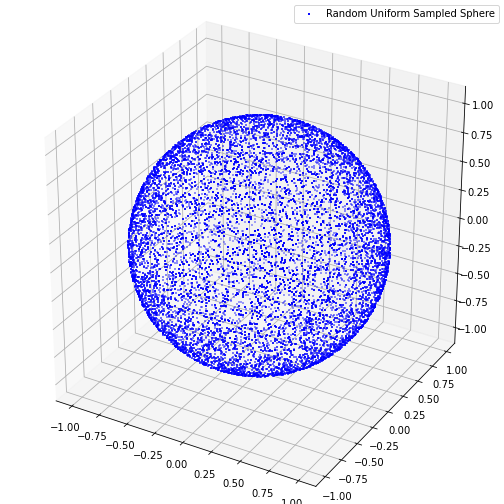

In [19]:
# creating figure 
fig = plt.figure(figsize = (7, 7)) 
ax1 = Axes3D(fig) 

# creating the plot 
plot_geeks = ax1.scatter(cartesian_sphere[0], cartesian_sphere[1], cartesian_sphere[2], color = "b",
                         marker=",",s=1, label="Random Uniform Sampled Sphere") 
# displaying the plot 
ax1.set_box_aspect([1, 1, 1])
plt.legend()
plt.show() 

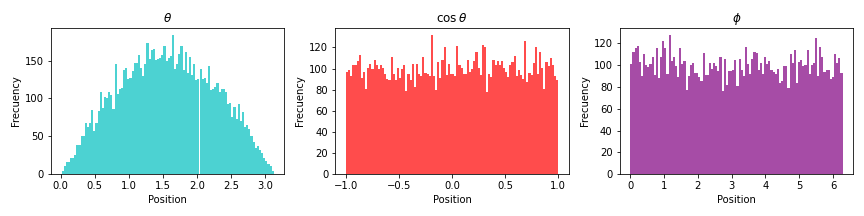

In [23]:
fig, axs = plt.subplots(ncols=3, figsize=(12, 3))

axs[0].hist(sphere[0], bins=100, color='c', alpha=0.7)
axs[0].set_title(r'$\theta$')
axs[0].set_xlabel('Position')
axs[0].set_ylabel('Frecuency')

axs[1].hist(sphere[2], bins=100, color='r', alpha=0.7)
axs[1].set_title(r'$\cos{\theta}$')
axs[1].set_xlabel('Position')
axs[1].set_ylabel('Frecuency')

axs[2].hist(sphere[1], bins=100, color='purple', alpha=0.7)
axs[2].set_title(r'$\phi$')
axs[2].set_xlabel('Position')
axs[2].set_ylabel('Frecuency')

# Ajustar espaciado entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

- Write a piece of code that will project the points into Carthesian coordinates ($x, y, z$), again assuming unit radius.  
- Make three 2D scatter plots of the points after projecting along the $x, y$ and $z$ axis. 
- Plot a 1D histogram of the $x, y$ and $z$ distributions.
- Interpret your results. In particular, discuss if your points are uniformly distributed. Why? Why not?

------------------------------

### This is just a test and models for plots (is **NOT** a projection)

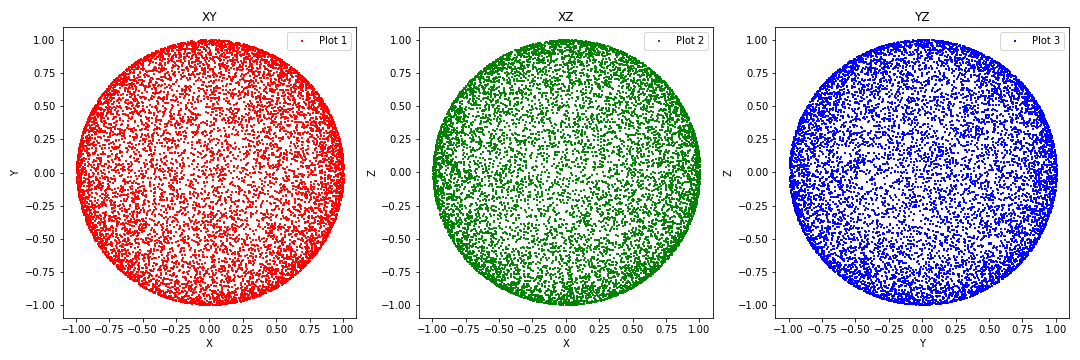

In [24]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

# Primer scatter plot
axs[0].scatter(cartesian_sphere[0], cartesian_sphere[1], color='r', label='Plot 1', marker=",",s=1)
axs[0].set_title('XY')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].legend()

# Segundo scatter plot
axs[1].scatter(cartesian_sphere[0], cartesian_sphere[2], color='g', label='Plot 2', marker=",",s=1)
axs[1].set_title('XZ')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Z')
axs[1].legend()

# Tercer scatter plot
axs[2].scatter(cartesian_sphere[1], cartesian_sphere[2], color='b', label='Plot 3', marker=",",s=1)
axs[2].set_title('YZ')
axs[2].set_xlabel('Y')
axs[2].set_ylabel('Z')
axs[2].legend()

# Ajustar espaciado entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()


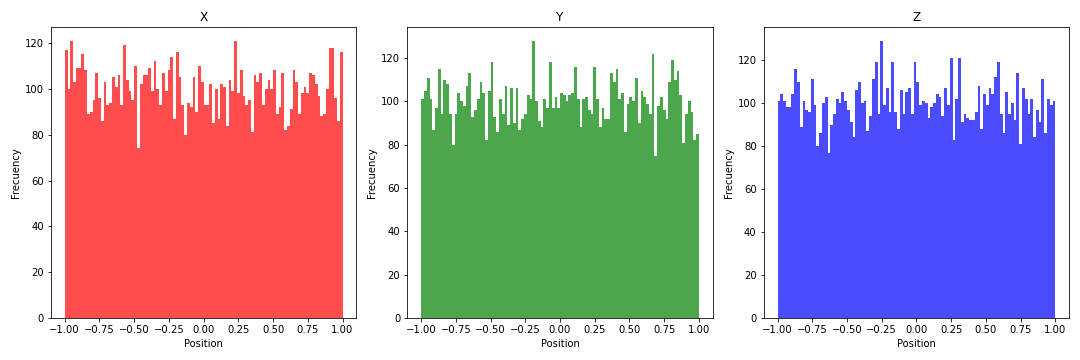

In [158]:
# Crear una figura y tres subgráficos en una fila
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

# Primer histograma
axs[0].hist(cartesian_sphere[0], bins=100, color='r', alpha=0.7)
axs[0].set_title('X')
axs[0].set_xlabel('Position')
axs[0].set_ylabel('Frecuency')

# Segundo histograma
axs[1].hist(cartesian_sphere[1], bins=100, color='g', alpha=0.7)
axs[1].set_title('Y')
axs[1].set_xlabel('Position')
axs[1].set_ylabel('Frecuency')

# Tercer histograma
axs[2].hist(cartesian_sphere[2], bins=100, color='b', alpha=0.7)
axs[2].set_title('Z')
axs[2].set_xlabel('Position')
axs[2].set_ylabel('Frecuency')

# Ajustar espaciado entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()